## Tugas 1: Mushroom Dataset with Decision Tree & Random Forest Algorithm

1. Import Library

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import math

2. Load Dataset

In [3]:
# Load data
df = pd.read_csv('data/mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Cek data imbalance

class_counts = df['class'].value_counts()

print(class_counts)


# Membagi fitur
x = df.loc[:,'cap-shape':'habitat']
y = df['class']

x = pd.get_dummies(x, dtype=int)
y = pd.get_dummies(y, dtype=int)

e    4208
p    3916
Name: class, dtype: int64


3. Visualisasi Imbalance

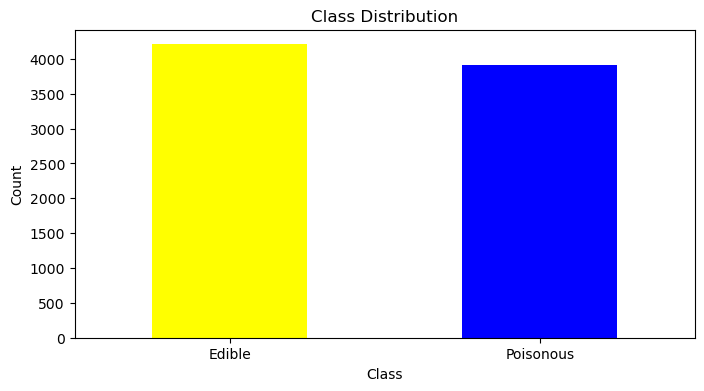

In [7]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
class_counts.plot(kind='bar', color=['yellow', 'blue'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'], rotation=0)
plt.show()

4. Split data test & train

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

5. Training Decision Tree dengan parameter default

In [9]:
dt = DecisionTreeClassifier()

# set training
dt.fit(X_train, y_train)

# memprediksi label set test
y_test_pred_dt = dt.predict(X_test)

# menghitung akurasi test
acc_test_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Test accuracy: {acc_test_dt*100:.2f}%")

# Memprediksi label training
y_train_pred_dt = dt.predict(X_train)

#  menghitung akurasi train
acc_train_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"Train accuracy: {acc_train_dt*100:.2f}%")

Test accuracy: 100.00%
Train accuracy: 100.00%


In [11]:
# Gambar Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['edible', 'poisonous'], rounded=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117) instead.

<Figure size 2000x1000 with 0 Axes>